# **An Introduction to Linear Algebra for Quantum Computing**

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import qiskit as qpk
from qiskit.visualization import plot_bloch_vector

In quantum computing, we often deal with state vectors, which are simply vectors that point to a specific point in space that corresponds to a particular quantum state. This can be visualized using a Bloch sphere. For instance, a vector representing the state of a quantum system could look something like this arrow, enclosed inside the Bloch sphere, which is the so-called "state space" of all possible points to which our state vectors can "point"

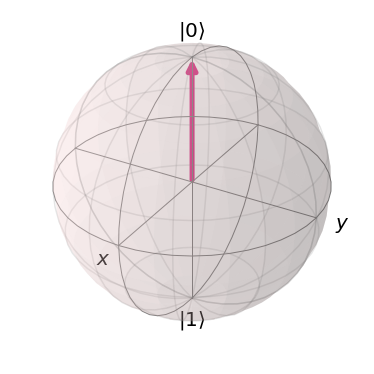

In [2]:
plot_bloch_vector([0, 0, 1])

Our vectors are allowed to rotate anywhere on the surface of the sphere, and each of these points represents a different quantum state.

## Matrix And Gates

Matrices are mathematical objects that transform vectors to other vectors:

$$\left| v \right\rangle \rightarrow \left| v' \right\rangle = M \left| v \right\rangle $$

To perform a quantum computation, we have some quantum state vector we manipulate by applying a matrix to that vector. A vector is simply a matrix with one column. To apply a matrix to a vector, therefore, we follow the same matrix multiplication procedure described above. We manipulate qubits in our quantum computer by applying sequences of quantum gates. Each quantum gate can be expressed as a matrix that can be applied to state vectors, thus changing the state. For instance, a commonly seen quantum gate is the Pauli-X gate, which is represented by the following matrix:

$$\sigma_{x} = \left( \begin{array}{cc}
1 & 0 \\
0 & 1
\end{array} \right)$$

This gate acts similarly to the classical NOT logic gate. It maps the computational basis state $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$ (it "flips" the state). We write the two basis states as column vectors:

$$|0\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ \ \ \ \ \ \ |1\rangle \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

$$\sigma_x |0\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ |1\rangle$$

$$\sigma_x |1\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ |0\rangle$$

Within quantum computation, we often encounter two important types of matrices: **Hermitian** and **Unitary** matrices.

 The basic idea about unitary matrices is that evolution of a quantum state by application of a unitary matrix "preserves" the quantum state.

## Linear Dependence

A set of vectors $|v_1\rangle, \ ..., \ |v_n\rangle$ is said to be **linearly dependent** if there exist corresponding coefficients for each vector, $b_i \ \in \ F$, such that:

<br>

$$b_1 |v_1\rangle \ + \ b_2 |v_2\rangle \ + \ ... \ + \ b_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ 0,$$

<br>

where at least one of the $b_i$ coefficients is non-zero. This is equivalent to the more intuitive statement that "the set of vectors can be expressed as linear combinations of each other".

Let's now consider a basic example. Consider the set of two vectors in $\mathbb{R}^2$, consisting of $|a\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $|b\rangle \ = \ \begin{pmatrix} 2 \\ 0 \end{pmatrix}$. If we choose the field over our vector space to be $\mathbb{R}$, then we can create a linear combination of these vectors that equates to $0$. For example:

<br>


$$2|a\rangle \ - \ |b\rangle \ = \ 0$$


<br>

A set of vectors is said to be **linearly independent** if there is no vector in the set that can be expressed as a linear combination of all the others.

The notion of a **basis** is simply a **linearly independent spanning set**. In this sense, the basis of a vector space is the minimal possible set that spans the entire space. We call the size of the basis set the **dimension** of the vector space.

Bases and spanning sets are important because they allow us to "shrink down" vector spaces and express them in terms of only a few vectors. We can come to certain conclusions about our basis set that we can generalize to the entire vector space, simply because we know every vector in the space is just a linear combination of the basis vectors. 

In quantum computation, one of the bases that we often encounter is $|0\rangle, \ |1\rangle$. We can write any other qubit state as a linear combination of these basis vectors. For instance, the linear combination

<br>


$$\frac{|0\rangle \ + \ |1\rangle}{\sqrt{2}}$$


<br>

represents a superposition between the $|0\rangle$ and $|1\rangle$ basis state, with equal probability of measuring the state to be in either one of the basis vector states (this is intuitive, as the "weight" or the "amount of each basis vector" in the linear combination is equal, both being scaled by $1/\sqrt{2}$).

## Hilbert Spaces

Hilbert Spaces are one of the most important mathematical constructs in quantum mechanics and quantum computation. A Hilbert space can be thought of as the state space in which all quantum state vectors "live". The main difference between a Hilbert space and any random vector space is that a Hilbert space is equipped with an inner product, which is an operation that can be performed between two vectors, returning a scalar.

In the context of quantum mechanics and quantum computation, the inner product between two state vectors returns a scalar quantity representing the amount to which the first vector lies along the second vector.

One of the most important conditions for a Hilbert space representing a quantum system is that the inner product of a vector with itself is equal to one: $\langle \psi | \psi \rangle \ = \ 1$. This is the so-called normalization condition, which states that the length of the vector squared (each component of the vector is squared and summed together, by defintion of the inner product) must be equal to one. The physical significance of this is that the length of a vector in a particular direction is representative of the "probability amplitude" of the quantum system with regards to measurement in that particular state. Obviously, the probability of the quantum system being measured in the state that it is in must be $1$ (after all, the sum of the probabilities of finding the quantum system in any particular state must equal $1$).

Unitary matrices are important in quantum computation because they preserve the inner product, meaning that no matter how you transform a vector under a sequence of unitary matrices, the normalization condition still holds true.

## Matrix Exponentials

The notion of a matrix exponential is a very specific yet extremely important concept. We often see unitary transformations in the form:

<br>
$$U \ = \ e^{i\gamma H},$$
<br>

where $H$ is some Hermitian matrix and $\gamma$ is some real number. It is fairly simple to prove that all matrices of this form are unitary. Taking the conjugate transpose of $U$, we get:

<br>


$$U^{\dagger} \ = \ \Big( e^{i\gamma H} \Big)^{\dagger} \ = \ e^{-i \gamma H^{\dagger}}$$


<br>

But since $H$ is Hermitian, we know that $H^{\dagger} \ = \ H$, thus:

<br>


$$e^{-i \gamma H^{\dagger}} \ = \ e^{-i \gamma H} \ \Rightarrow \ U^{\dagger} U \ = \ e^{-i \gamma H} e^{i\gamma H} \ = \ \mathbb{I}$$


<br>

You may wonder why a matrix inside of an exponential can still be considered a matrix.  The answer becomes clearer when we expand our exponential function as a Taylor series. Recall from calculus that a Taylor series is essentially a way to write any function as an infinite-degree polynomial, and the main idea is to choose the terms of the polynomial and center it at some point $x_0$ lying on the function we are trying to transform into the polynomial, such that the zeroth, first, second, third, etc. derivative is the same for both the original function and the polynomial. Thus, we write our Taylor series in the form:

<br>
$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(x_0) \ \frac{(x \ - \ x_0)^n}{n!},$$
<br>

where $g(x)$ is the polynomial, $f(x)$ is the original function, $f^{(n)}$ is the $n$-th derivative of $f$, and $x_0$ is the point at which we center the function. Since we are not approximating, $x_0$ doesn't matter, so for simplicity, we choose $x_0 \ = \ 0$, and the Taylor series becomes a Maclaurin series:

<br>


$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(0) \ \frac{x^n}{n!}$$


<br>

If we choose $f(x) \ = \ e^x$, we can create an equivalent polynomial using the Maclaurin series. Since the derivative of $e^x$ is simply $e^x$, and evidently, $e^0 \ = \ 1$, we get:

<br>


$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{x^n}{n!} \ = \ e^x$$


<br>

Thus, for some matrix, $i \gamma H$, we get:

<br>


$$e^{i \gamma H} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma H)^n}{n!}$$


<br>

Therefore, the exponential of a matrix is a matrix. It is an infinite sum of powers of matrices, which admittedly looks overly complex...but the point here is that the matrix exponential is indeed a matrix. 

We are now in a position to demonstrate a very important fact: if we have some matrix $B$ such that $B^2 \ = \ \mathbb{I}$ (this is called an **involutory matrix**), then:

<br>


$$e^{i \gamma B} \ = \ \cos(\gamma) \mathbb{I} \ + \ i \sin(\gamma) B$$


<br>

We start with the Maclaurin series:

<br>


$$e^{i \gamma B} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!}$$


<br>

Notice that we can split the summation into an imaginary part and a real part, based on whether $n$ is even or odd in each term of the sum:

<br>


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!}$$


<br>

Now, let us find the Maclaurin series for both $\sin x$ and $\cos x$. We'll start with $f(x) \ = \ \sin x$:

<br>


$$\sin x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$


<br>

The derivative of $\sin x$ is **cyclical** in a sense (each arrow represents taking the derivative of the previous function):

<br>


$$\sin x \ \rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x$$


<br>

Since $\sin (0) \ = \ 0$ and $\cos (0) \ = \ 1$, all terms with even $n$ become $0$, and we get:

<br>


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n \ + \ 1}}{(2n \ + \ 1)!}$$


<br>

This looks similar to the odd term of our original equation. In fact, if we let $x \ = \ \gamma B$, they are exactly the same. We follow a process that is almost identical to show that the even terms are the same as the Maclaurin series for $f(x) \ = \ \cos x$:

<br>


$$\cos x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$


<br>


$$\Rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x \ \rightarrow \ \cos x$$


<br>


$$\Rightarrow \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n}}{(2n)!}$$


<br>

Let us go back to the original equation. Recall that $B^2 \ = \ \mathbb{I}$. For any $n$, we have:

<br>


$$B^{2n} \ = \ \big( B^2 \Big)^n \ = \ \mathbb{I}^n \ = \ \mathbb{I}$$


<br>


$$B^{2n \ + \ 1} \ = \ B \ \big( B^2 \Big)^n \ = \ B \ \mathbb{I}^n \ = \ B \ \mathbb{I} \ = \ B$$


<br>

Substituting in this new information, we get:

<br>


$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!} \ = \ \mathbb{I} \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n}}{(2n)!} \ + \ i B \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1}}{(2n + 1)!} \ = \ \cos (\gamma) \mathbb{I} \ + \ i \sin (\gamma) B$$


<br>

This fact is extremely useful in quantum computation. Consider the Pauli matrices:

<br>


$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$


<br>


$$\sigma_y \ = \ \begin{pmatrix} 0 & i \\ -i & 0 \end{pmatrix}$$


<br>


$$\sigma_z \ = \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$


<br>

These matrices are among the fundamental "quantum gates" used to manipulate qubits. These operations are not only unitary, they are also **Hermitian** and **Involutory**. This means that a matrix of the form $e^{i \gamma \sigma_k} \ k \ \in \ \{x, \ y, \ z\}$ is not only a valid unitary matrix that can act upon a quantum state vector (a qubit), but it can be expressed using the sine-cosine relationship that we just proved. This is very powerful, and is seen throughout quantum computational theory, as gates of this type are used all the time.

One last important fact about matrix exponentials: if we have some matrix $M$, with eigenvectors $|v\rangle$ and corresponding eigenvalues $v$, then:

<br>


$$e^{M} |v\rangle \ = \ e^v |v\rangle$$


<br>

This one is much more straightforward to prove:

<br>


$$e^M |v\rangle \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{B^n |v\rangle}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{v^n |v\rangle}{n!} \ = \ e^v |v\rangle$$


<br>

This fact is also very useful. When creating quantum circuits that simulate a certain Hamiltonian (especially for variational circuits), we frequently use gates of the form $e^{i \gamma \sigma_z}$. Since $|0\rangle$ and $|1\rangle$ are eigenvalues of $\sigma_z$, we can easily determine mathematically that $e^{i \gamma \sigma_z}$ will add a phase of $e^{i \gamma}$ to $|0\rangle$, and will add a phase of $e^{-i\gamma}$ to $|1\rangle$. We can then construct this gate in terms of $CNOT$ and phase/rotation gates fairly easily, as we know the mathematical outcome of the gate on each of the computational basis states.

This fact doesn't only apply to exponentials of the $\sigma_z$ gate. For example, we can determine the outcome of a gate of the form $e^{i \gamma \sigma_x}$ on the eigenvectors of $\sigma_x$, $(|0\rangle \ + \ |1\rangle)/\sqrt{2}$ and $(|0\rangle \ - \ |1\rangle)/\sqrt{2}$. The same applies to exponentials of the $\sigma_y$ matrix.